In [466]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# At this point, we did some manual cleanig in Excel.
# Such as replaced common not usefull strings with empty strings
df = pd.read_csv('Marvel full Dataframe.csv', low_memory = False)
df.shape
# ended up with the shape: (74929, 12)

In [ ]:
## Drops column that added by the 'read_csv' call
df.drop(labels = 'Unnamed: 0',axis = 1, inplace = True)

## Drops all duplicates
df.drop_duplicates(inplace = True, ignore_index = True)

## Drop empty rows
df.dropna(axis = 0, how = 'all',inplace = True)

## Drops rows with 2 or more NaN features
df.dropna(axis = 0, how ='any', thresh = 9 ,inplace= True)

df.shape
# Ended up with the shape: (52456, 11)

In [ ]:
## Cleaning the 'Year' column
## Any cells which are not numbers make them 'None'
year = df['Year']
for i, x in enumerate(year.tolist()):
    if x.isdigit() == False:
            year[i] = None
df['Year'] = year

## Cleaning the 'Appearnces' column
## Any cells which are not numbers make them 'None'
appearnces = df['Appearnces']
for i, x in enumerate(appearnces.tolist()):
    if x.isdigit() == False:
            appearnces[i] = None
            
df['Appearnces'] = appearnces

In [460]:
# fill the missing values with 'first fill' method
df.fillna(method = 'ffill', axis = 0, inplace = True)

# reset the Indexes
df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [461]:
# We sorted the data frame by 'Appearnces' and droped character
# with the same name and kept the one with the highest appearnces
df_sorted = df.sort_values(by =['Appearnces'])
df_sorted.drop_duplicates(subset=['Name'], keep='last', inplace=True, ignore_index=True)
df_sorted.sort_values(by =['Name'], inplace=True, ignore_index=True)
df = df_sorted

In [462]:
df = pd.read_csv('Marvel Dataframe after drop and fill7.csv')
df

,Name,Marital Status,Reality,Gender,Hair Color,Eye Color,Living status,Identity,Citenzenship,Year,Appearnces
0,Bryant,Single,Earth-616,Male,Brown,Green,Alive,No Dual,American,2018,3
1,Tanner,Single,Earth-616,Male,Brown,Brown,Alive,No Dual,British,1976,12
2,"""AJ""",Single,Earth-199999,Male,Black,Brown,Alive,No Dual,American,2021,3
3,"""Froggy"" Neilsen",Single,Earth-9047,Male,Brown,Blue,Alive,Public,American,1988,2
4,"""Rico"" Richards",Single,Earth-41001,Male,Blond,Blue,Alive,Public,American,2008,10
...,...,...,...,...,...,...,...,...,...,...,...
24499,von Widemouth,Single,Earth-616,Male,Brown,Red,Deceased,No Dual,German,1943,1
24500,Äkräs,Single,Earth-TRN517,Male,White,Yellow,Alive,No Dual,Battlerealm,2018,1
24501,Ögedei Khan,Married,Earth-616,Male,Black,Black,Deceased,No Dual,Mongolian,2021,1
24502,Øde,Married,Earth-616,Male,No Hair At All,Black,Deceased,No Dual,Unknown,2020,2


C:\Users\guyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

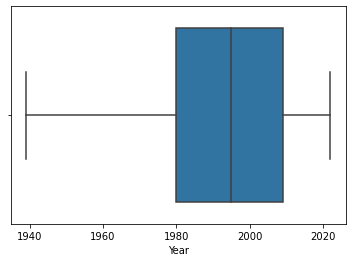

In [463]:
sns.boxplot(df.Year)

C:\Users\guyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Appearnces'>

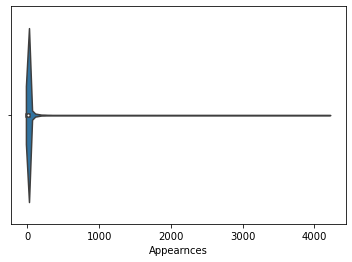

In [464]:
sns.violinplot(df.Appearnces)


C:\Users\guyge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Appearnces'>

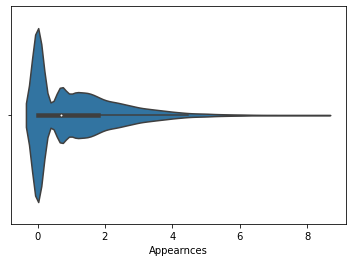

In [465]:
df['Appearnces'] = np.log(df.Appearnces)
sns.violinplot(df.Appearnces)

In [431]:
# Attempt to find outliers with IQR method

# Q1 = np.percentile(df["Appearnces"], 25)
# Q3 = np.percentile(df["Appearnces"], 75)
# IQR = Q3 - Q1
# df.Appearnces[(df["Appearnces"] < Q1 - 1.5*IQR) | (df["Appearnces"] > Q3 + 1.5*IQR )] = np.nan
# df.Appearnces.count()
# sns.violinplot(df.Appearnces)

In [432]:
# Attempt to find outliers with Z-Score method

# z_score = (df["Appearnces"] - df["Appearnces"].mean()) / df["Appearnces"].std()
# outliers = abs(z_score) > 3
# df.Appearnces[outliers] = np.nan
# df.Appearnces.count()
# sns.violinplot(df.Appearnces)

In [433]:
# Fill the NaN values with the median value fo the column, 
#(Finding outliers and replacing them with the median gave worse scores)

# df['Appearnces'].fillna((df['Appearnces'].median()), inplace=True)
# sns.violinplot(df.Appearnces)
# df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
# df.sort_values(by =['Name'], inplace=True, ignore_index=True)
# df

Here we chose to keep all categories.
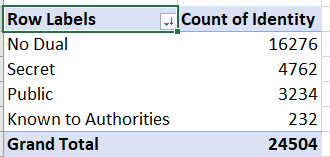
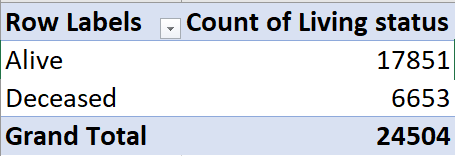

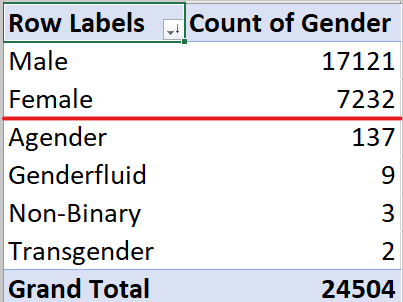

We chose to divide into Male, Female and Other

In [437]:
gender_label = ['Male','Female']
gender = df['Gender']
for i,x in enumerate(gender.tolist()):
    if x not in gender_label:
        gender[i] = 'Other'
df['Gender'] = gender

C:\Users\guyge\AppData\Local\Temp/ipykernel_168920/1915062332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[i] = 'Other'


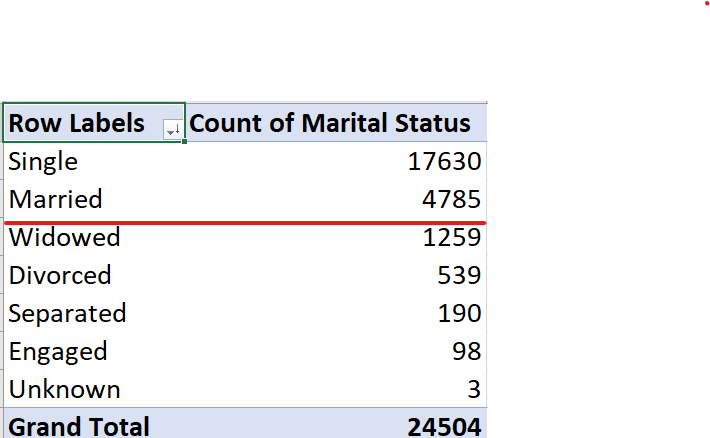

We chose to divide into Single, Married which is way above the next status

In [438]:
mstatus_labels = ['Married', 'Single']
mstatus = df['Marital Status']
for i,x in enumerate(mstatus.tolist()):
    if x not in mstatus_labels:
        mstatus[i] = 'Other'
df['Marital Status'] = mstatus

C:\Users\guyge\AppData\Local\Temp/ipykernel_168920/685352419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mstatus[i] = 'Other'


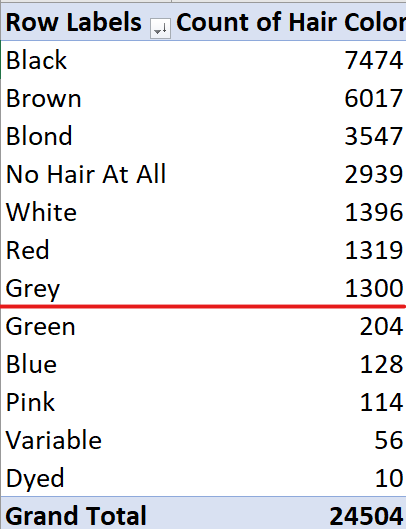

We chose to divide into Black, Brown, Blond, No Hair, Red, White which is way above the next one in the chart.

In [439]:
hair_color_labels = ['Black', 'Blond', 'Brown', 'Grey', 'No Hair At All', 'Red', 'White']
hair_color = df['Hair Color']
for i,x in enumerate(hair_color.tolist()):
    if x not in hair_color_labels:
        hair_color[i] = 'Other'
df['Hair Color'] = hair_color

C:\Users\guyge\AppData\Local\Temp/ipykernel_168920/1872259874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair_color[i] = 'Other'


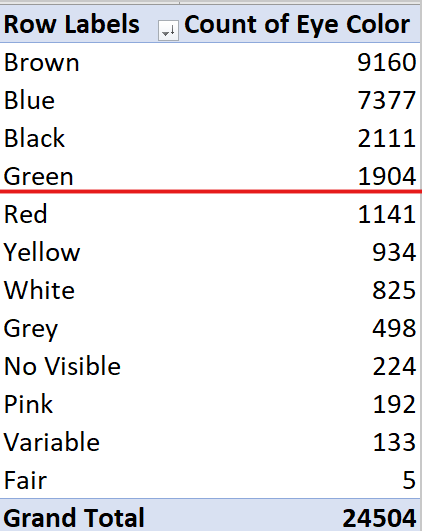


We chose to divide into Brown, Blue, Black, Green which represent 84% and Other

In [440]:
print((( 9160 + 7477 + 2111 + 1904 )/ 24505 ) * 100,'%')

84.27667822893287 %


In [441]:
eye_color_labels = ['Black', 'Blue', 'Brown','Green']
eye_color = df['Eye Color']
for i,x in enumerate(eye_color.tolist()):
    if x not in eye_color_labels:
        eye_color[i] = 'Other'
df['Eye Color'] = eye_color

C:\Users\guyge\AppData\Local\Temp/ipykernel_168920/556115365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_color[i] = 'Other'


This is only the top 6 there were many more.
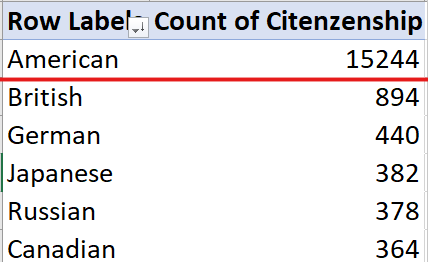

We chose to divide into American which is more then 50% and American and way above the next Citizenship

In [442]:
citizen_labels = ['American']
citizen = df['Citenzenship']
for i,x in enumerate(citizen.tolist()):
    if x not in citizen_labels:
        citizen[i] = 'Other'
df['Citenzenship'] = citizen

C:\Users\guyge\AppData\Local\Temp/ipykernel_168920/4040519781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citizen[i] = 'Other'


This is only the top 6 there were many more.
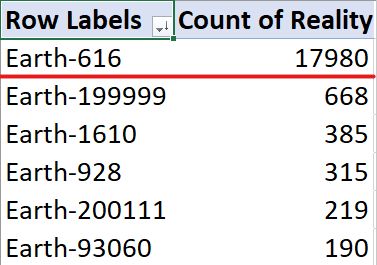

We chose to divide into Earth-616 which is more then 50% and Earth-616 and way above the next Reality

In [443]:
reality_label = ['Earth-616']
reality = df['Reality']
for i,x in enumerate(reality.tolist()):
    if x not in reality_label:
        reality[i] = 'Other'
df['Reality'] = reality

C:\Users\guyge\AppData\Local\Temp/ipykernel_168920/570686255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reality[i] = 'Other'


In [444]:
df.to_csv('Marvel Dataframe before Dummies.csv')

Transform all categoreis into dummies, and drop one column for better acurracy.

In [445]:
df2 = pd.get_dummies(df, prefix=['Gender'], prefix_sep='_', dummy_na=False, columns=['Gender'], drop_first=True)

In [446]:
df3 =  pd.get_dummies(df2, prefix=['M Status'], prefix_sep='_', dummy_na=False, columns=['Marital Status'], drop_first=True)

In [447]:
df4 =  pd.get_dummies(df3, prefix=['Hair C'], prefix_sep='_', dummy_na=False, columns=['Hair Color'], drop_first=True)

In [448]:
df5 =  pd.get_dummies(df4, prefix=['Eye C'], prefix_sep='_', dummy_na=False, columns=['Eye Color'], drop_first=True)

In [449]:
df6 =  pd.get_dummies(df5, prefix=['L status'], prefix_sep='_', dummy_na=False, columns=['Living status'], drop_first=True)

In [450]:
df7 =  pd.get_dummies(df6, prefix=['Identity'], prefix_sep='_', dummy_na=False, columns=['Identity'], drop_first=True)

In [451]:
df8 = pd.get_dummies(df7, prefix=['Reality'], prefix_sep='_', dummy_na=False, columns=['Reality'], drop_first=True)

In [452]:
df9 = pd.get_dummies(df8, prefix=['Citenzenship'], prefix_sep='_', dummy_na=False, columns=['Citenzenship'], drop_first=True)
df9.to_csv('Marvel Dataframe after drop and fill12.csv')

In [453]:
df9.describe()

,Year,Appearnces,Gender_Male,Gender_Other,M Status_Other,M Status_Single,Hair C_Blond,Hair C_Brown,Hair C_Grey,Hair C_No Hair At All,...,Eye C_Blue,Eye C_Brown,Eye C_Green,Eye C_Other,L status_Deceased,Identity_No Dual,Identity_Public,Identity_Secret,Reality_Other,Citenzenship_Other
count,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,...,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000,24504.000000
mean,1992.304767,1.121848,0.698702,0.006285,0.085251,0.719474,0.144752,0.245470,0.053053,0.119940,...,0.301012,0.373817,0.077702,0.161321,0.271507,0.664218,0.131978,0.194336,0.266242,0.377897
std,20.740411,1.299832,0.458831,0.079028,0.279261,0.449265,0.351858,0.430374,0.224143,0.324898,...,0.458707,0.483826,0.267707,0.367834,0.444746,0.472273,0.338474,0.395696,0.442001,0.484872
min,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1995.000000,0.693147,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,1.791759,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2022.000000,8.342602,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
